### **Praktikum 1. Menghitung Jarak Berbasis Piksel (Euclidean & Manhattan)**

Jarak Euclidean antara Patch 1 dan Patch 2: 24.7650
Jarak Euclidean antara Patch 1 dan Patch 3: 5.0000
Jarak Manhattan antara Patch 1 dan Patch 2: 936.4392
Jarak Manhattan antara Patch 1 dan Patch 3: 250.0000


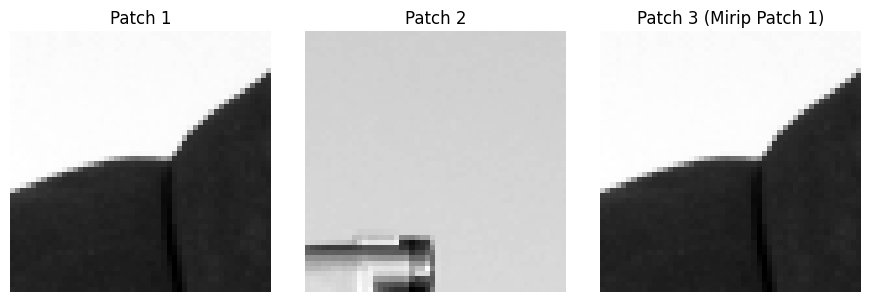

In [1]:
import numpy as np
from skimage import data, img_as_float
from scipy.spatial import distance
import matplotlib.pyplot as plt

image = img_as_float(data.camera())
patch1 = image[100:150, 100:150]
patch2 = image[100:150, 300:350]
patch3 = patch1 + 0.1
patch3 = np.clip(patch3, 0, 1)

vec1 = patch1.flatten()
vec2 = patch2.flatten()
vec3 = patch3.flatten()

dist_l2_12 = distance.euclidean(vec1, vec2)
dist_l2_13 = distance.euclidean(vec1, vec3)
dist_l1_12 = distance.cityblock(vec1, vec2)
dist_l1_13 = distance.cityblock(vec1, vec3)

print(f"Jarak Euclidean antara Patch 1 dan Patch 2: {dist_l2_12:.4f}")
print(f"Jarak Euclidean antara Patch 1 dan Patch 3: {dist_l2_13:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 2: {dist_l1_12:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 3: {dist_l1_13:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].imshow(patch1, cmap='gray')
axes[0].set_title('Patch 1')
axes[0].axis('off')
axes[1].imshow(patch2, cmap='gray')
axes[1].set_title('Patch 2')
axes[1].axis('off')
axes[2].imshow(patch3, cmap='gray')
axes[2].set_title('Patch 3 (Mirip Patch 1)')
axes[2].axis('off')
plt.tight_layout()
plt.show()

### **Praktikum 2. Menghitung Cosine Similarity antara Histogram Warna**

Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): 0.8156
Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): 1.0000
Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): 1.0000


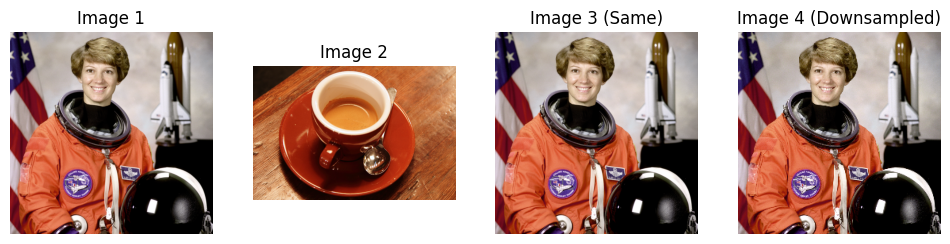

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte, io, color
from scipy.spatial import distance

def calculate_rgb_histogram(image, bins=16):
    img_uint8 = img_as_ubyte(image)
    hist_r, _ = np.histogram(img_uint8[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(img_uint8[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(img_uint8[:,:,2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_combined = hist_combined.astype(float) / np.sum(hist_combined)
    return hist_combined

try:
    image1 = data.astronaut()
    image2 = data.coffee()
    image3 = data.astronaut()
    image4 = image1[::2, ::2, :]
except Exception as e:
    print(f"Gagal memuat data skimage: {e}. Membuat citra dummy.")
    image1 = np.random.rand(100, 100, 3)
    image2 = np.random.rand(100, 100, 3) * 0.5
    image3 = image1.copy()
    image4 = image1[::2,::2,:]

hist1 = calculate_rgb_histogram(image1)
hist2 = calculate_rgb_histogram(image2)
hist3 = calculate_rgb_histogram(image3)
hist4 = calculate_rgb_histogram(image4)

sim_12 = 1 - distance.cosine(hist1, hist2)
sim_13 = 1 - distance.cosine(hist1, hist3)
sim_14 = 1 - distance.cosine(hist1, hist4)

print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): {sim_12:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): {sim_13:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): {sim_14:.4f}")

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image1)
axes[0].axis('off')
axes[1].imshow(image2)
axes[1].axis('off')
axes[2].imshow(image3)
axes[0].set_title('Image 1')
axes[1].set_title('Image 2')
axes[2].set_title('Image 3 (Same)')
axes[2].axis('off')
axes[3].imshow(image4)
axes[3].set_title('Image 4 (Downsampled)')
axes[3].axis('off')
plt.show()

### **Praktikum 3. Menghitung Structural Similarity Index (SSIM)**

SSIM (Ref vs Same): 1.0000
SSIM (Ref vs Noisy): 0.2963
SSIM (Ref vs Contrast): 0.9651
SSIM (Ref vs Blurred): 0.8027


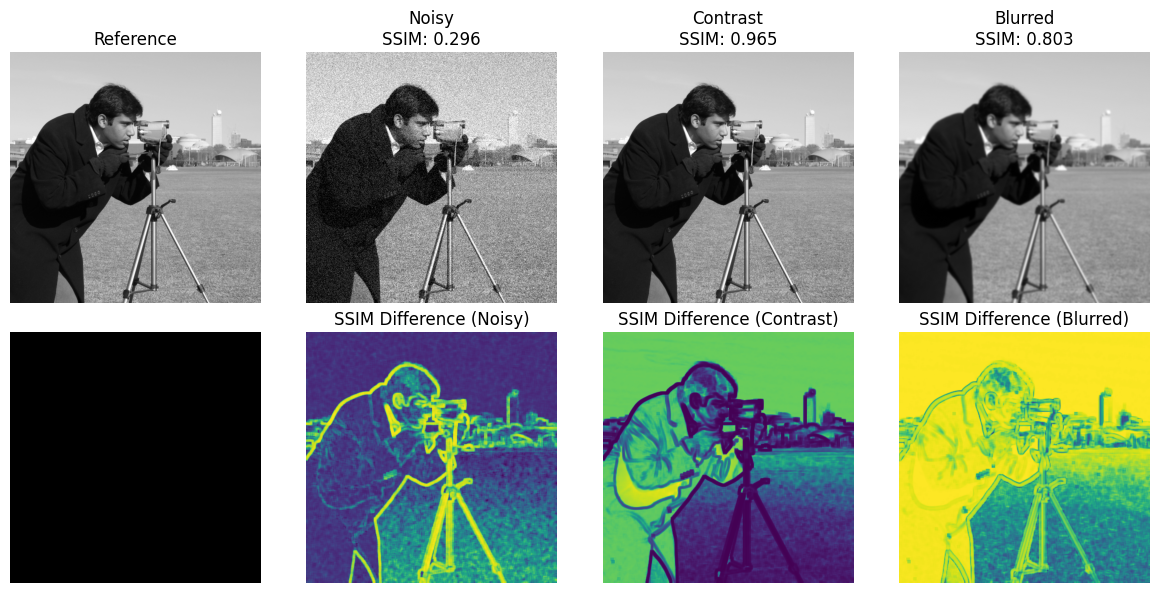

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters import gaussian

# Load reference image
image_ref = img_as_float(data.camera())

# Create modified versions
image_same = image_ref.copy()
image_noisy = random_noise(image_ref, mode='gaussian', var=0.01)
image_contrast = np.clip(image_ref * 0.8, 0, 1)
image_blurred = gaussian(image_ref, sigma=1.5, channel_axis=None)

# Calculate SSIM
data_range = image_ref.max() - image_ref.min()

ssim_same, _ = ssim(image_ref, image_same, data_range=data_range, full=True)
ssim_noisy, diff_noisy = ssim(image_ref, image_noisy, data_range=data_range, full=True)
ssim_contrast, diff_contrast = ssim(image_ref, image_contrast, data_range=data_range, full=True)
ssim_blurred, diff_blurred = ssim(image_ref, image_blurred, data_range=data_range, full=True)

# Print results
print(f"SSIM (Ref vs Same): {ssim_same:.4f}")
print(f"SSIM (Ref vs Noisy): {ssim_noisy:.4f}")
print(f"SSIM (Ref vs Contrast): {ssim_contrast:.4f}")
print(f"SSIM (Ref vs Blurred): {ssim_blurred:.4f}")

# Visualization
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(image_ref, cmap='gray')
ax[0].set_title('Reference')
ax[0].axis('off')

ax[1].imshow(image_noisy, cmap='gray')
ax[1].set_title(f'Noisy\nSSIM: {ssim_noisy:.3f}')
ax[1].axis('off')

ax[2].imshow(image_contrast, cmap='gray')
ax[2].set_title(f'Contrast\nSSIM: {ssim_contrast:.3f}')
ax[2].axis('off')

ax[3].imshow(image_blurred, cmap='gray')
ax[3].set_title(f'Blurred\nSSIM: {ssim_blurred:.3f}')
ax[3].axis('off')

ax[4].imshow(np.zeros_like(image_ref), cmap='gray')
ax[4].set_title('')
ax[4].axis('off')

ax[5].imshow(diff_noisy, cmap='viridis')
ax[5].set_title('SSIM Difference (Noisy)')
ax[5].axis('off')

ax[6].imshow(diff_contrast, cmap='viridis')
ax[6].set_title('SSIM Difference (Contrast)')
ax[6].axis('off')

ax[7].imshow(diff_blurred, cmap='viridis')
ax[7].set_title('SSIM Difference (Blurred)')
ax[7].axis('off')

plt.tight_layout()
plt.show()

### **Praktikum 4. Penerapan Template Matching**

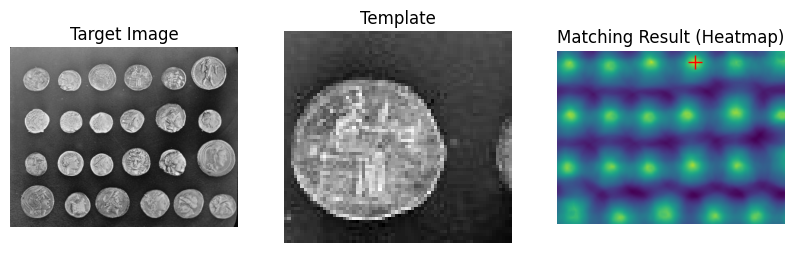

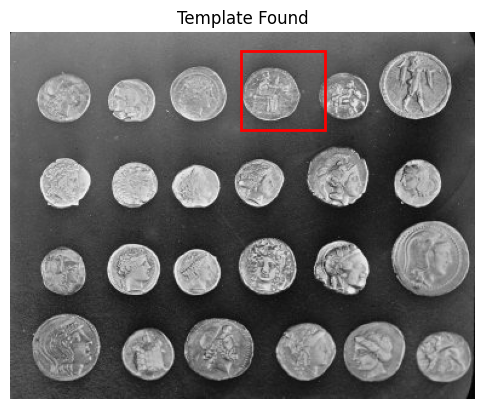

Template found at coordinates (x,y): (190, 15)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

# Load target image and create template
image = data.coins()
template = image[15:80, 190:260]

# Perform template matching using Normalized Cross-Correlation
result = match_template(image, template)

# Find location with highest matching score
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]  # Coordinates (x, y) of top-left template match

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].set_axis_off()

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].set_axis_off()

# Display matching heatmap
ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].set_axis_off()
ax[2].plot(x, y, 'r+', markersize=10)  # Mark best match location

# Display found template on original image
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.set_axis_off()
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)

plt.show()

print(f"Template found at coordinates (x,y): ({x}, {y})")

### **Praktikum 5. Simulasi Content-Based Image Retrieval (CBIR) Sederhana**

Processing image database...
- Processed astronaut
- Processed camera
- Processed coffee
- Processed coins
- Processed chelsea

Retrieval results (rightmost is least similar):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


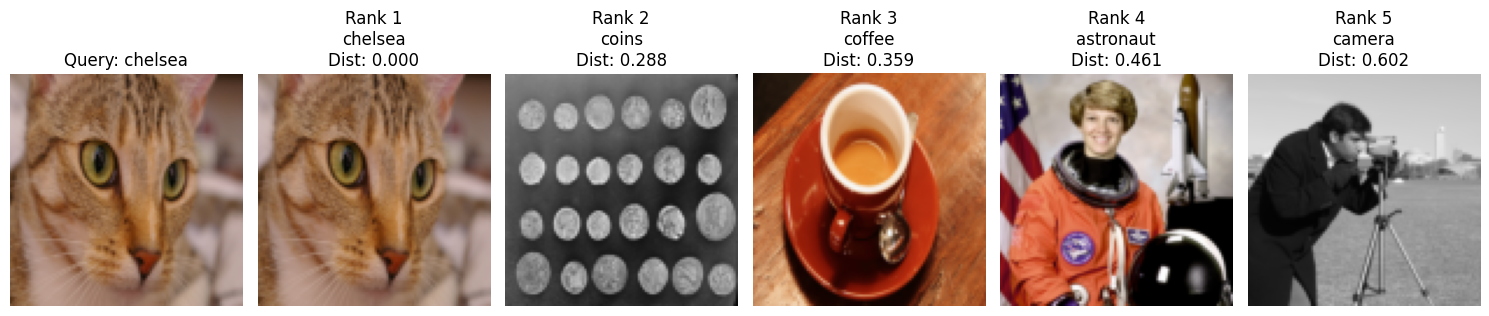

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, color, transform, img_as_float
from scipy.spatial import distance

def calculate_rgb_histogram(image, bins=16):
    """Calculate normalized RGB histogram for an image"""
    if image.dtype == float:
        image = img_as_ubyte(image)
    
    hist_r, _ = np.histogram(image[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:,:,2].ravel(), bins=bins, range=(0, 256))
    
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_sum = np.sum(hist_combined)
    hist_combined = hist_combined.astype(float) / hist_sum if hist_sum > 0 else hist_combined.astype(float)
    return hist_combined

# Prepare image database
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []

print("Processing image database...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        print(f"- Processed {name}")
    except Exception as e:
        print(f"Error processing {name}: {e}")

# Set query image (the cat)
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]

# Calculate distances between query and database images
distances = [distance.cosine(query_hist, hist) for hist in database_hists]

# Sort images by similarity
sorted_indices = np.argsort(distances)

# Display results
num_results = len(database_images)
fig, axes = plt.subplots(1, num_results + 1, figsize=(15, 3))

# Show query image
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

# Show ranked results
print("\nRetrieval results (rightmost is least similar):")
for rank, idx in enumerate(sorted_indices, start=1):
    ax = axes[rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

# Hide unused axes
for j in range(num_results + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **Penugasan**

Processing image database...
- Processed astronaut
- Processed camera
- Processed coffee
- Processed coins
- Processed chelsea

Retrieval results using RGB Histogram (Cosine Distance) (rightmost is least similar):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


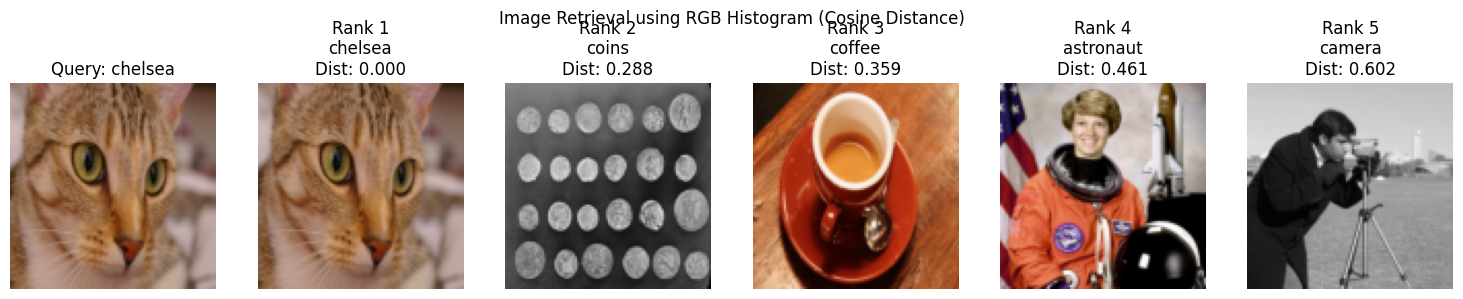


Retrieval results using Mean Color (Euclidean Distance) (rightmost is least similar):
Rank 1: chelsea (Distance: 0.000)
Rank 2: astronaut (Distance: 0.050)
Rank 3: coffee (Distance: 0.176)
Rank 4: camera (Distance: 0.194)
Rank 5: coins (Distance: 0.211)


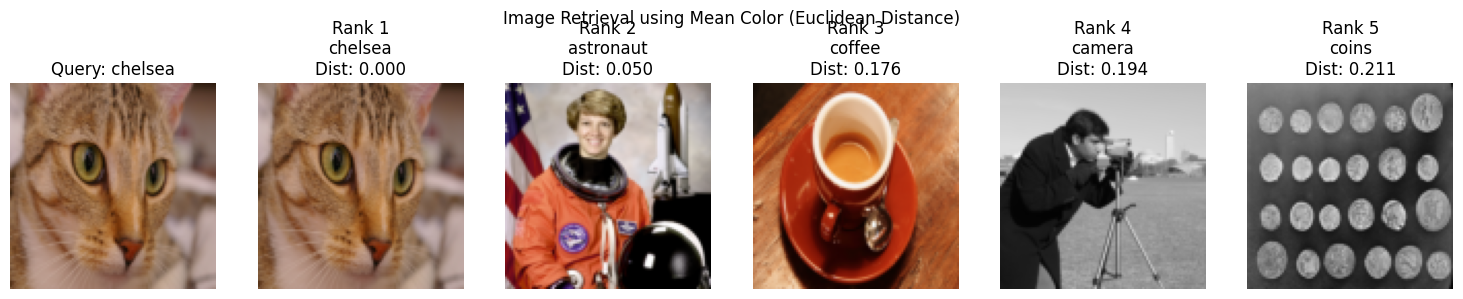

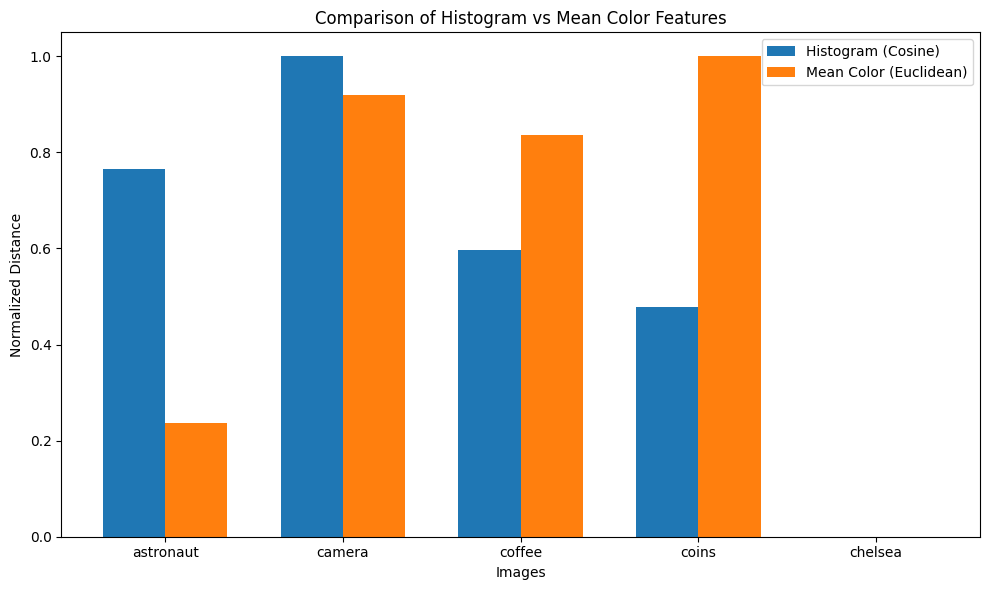


Ranking comparison:
Image		Histogram Rank	Mean Color Rank
astronaut   	4		2
camera      	5		4
coffee      	3		3
coins       	2		5
chelsea     	1		1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, color, transform, img_as_float, img_as_ubyte
from scipy.spatial import distance

def calculate_rgb_histogram(image, bins=16):
    """Calculate normalized RGB histogram for an image"""
    if image.dtype == float:
        image = img_as_ubyte(image)
    
    hist_r, _ = np.histogram(image[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:,:,2].ravel(), bins=bins, range=(0, 256))
    
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_sum = np.sum(hist_combined)
    hist_combined = hist_combined.astype(float) / hist_sum if hist_sum > 0 else hist_combined.astype(float)
    return hist_combined

def calculate_mean_color(image):
    """Calculate mean R, G, B values for an image as a 3D feature vector"""
    mean_r = np.mean(image[:,:,0])
    mean_g = np.mean(image[:,:,1])
    mean_b = np.mean(image[:,:,2])
    return np.array([mean_r, mean_g, mean_b])

# Prepare image database
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []
database_means = []

print("Processing image database...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        database_means.append(calculate_mean_color(img_resized))
        print(f"- Processed {name}")
    except Exception as e:
        print(f"Error processing {name}: {e}")

# Set query image (the cat)
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]
query_mean = database_means[query_index]

# Calculate distances between query and database images - using histogram (cosine)
hist_distances = [distance.cosine(query_hist, hist) for hist in database_hists]

# Calculate distances between query and database images - using mean color (euclidean)
mean_distances = [distance.euclidean(query_mean, mean) for mean in database_means]

# Sort images by similarity for both methods
hist_sorted_indices = np.argsort(hist_distances)
mean_sorted_indices = np.argsort(mean_distances)

# Function to display results
def display_results(distances, sorted_indices, feature_name):
    # Display results
    num_results = len(database_images)
    fig, axes = plt.subplots(1, num_results + 1, figsize=(15, 3))
    
    # Show query image
    axes[0].imshow(query_image)
    axes[0].set_title(f"Query: {query_image_name}")
    axes[0].axis('off')
    
    # Show ranked results
    print(f"\nRetrieval results using {feature_name} (rightmost is least similar):")
    for rank, idx in enumerate(sorted_indices, start=1):
        ax = axes[rank]
        ax.imshow(database_images[idx])
        ax.set_title(f"Rank {rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
        ax.axis('off')
        print(f"Rank {rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")
    
    plt.suptitle(f"Image Retrieval using {feature_name}")
    plt.tight_layout()
    plt.show()

# Display results for histogram-based retrieval
display_results(hist_distances, hist_sorted_indices, "RGB Histogram (Cosine Distance)")

# Display results for mean color-based retrieval
display_results(mean_distances, mean_sorted_indices, "Mean Color (Euclidean Distance)")

# Comparison visualization
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(image_db_names))

# Normalize distances for better comparison
norm_hist_distances = hist_distances / np.max(hist_distances)
norm_mean_distances = mean_distances / np.max(mean_distances)

plt.bar(x - width/2, [norm_hist_distances[i] for i in range(len(image_db_names))], width, label='Histogram (Cosine)')
plt.bar(x + width/2, [norm_mean_distances[i] for i in range(len(image_db_names))], width, label='Mean Color (Euclidean)')

plt.xlabel('Images')
plt.ylabel('Normalized Distance')
plt.title('Comparison of Histogram vs Mean Color Features')
plt.xticks(x, image_db_names)
plt.legend()
plt.tight_layout()
plt.show()

# Analyze ranking differences
print("\nRanking comparison:")
print("Image\t\tHistogram Rank\tMean Color Rank")
for name in image_db_names:
    hist_rank = np.where(hist_sorted_indices == image_db_names.index(name))[0][0] + 1
    mean_rank = np.where(mean_sorted_indices == image_db_names.index(name))[0][0] + 1
    print(f"{name:<12}\t{hist_rank}\t\t{mean_rank}")

=== Original Template ===


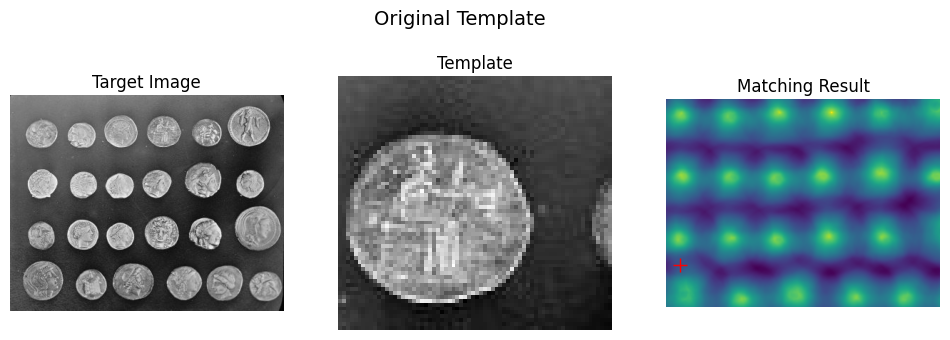

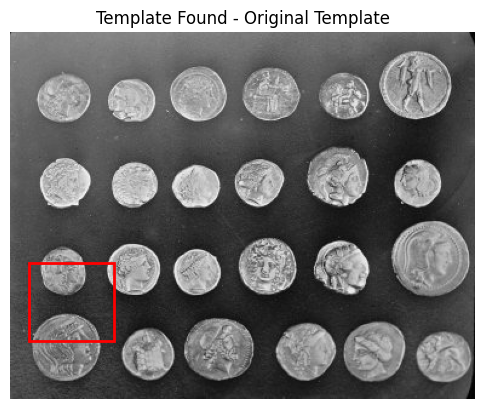

Best match at (x,y): (15, 190) with template size: (65, 70)

=== Rotated Template (15 degrees) ===


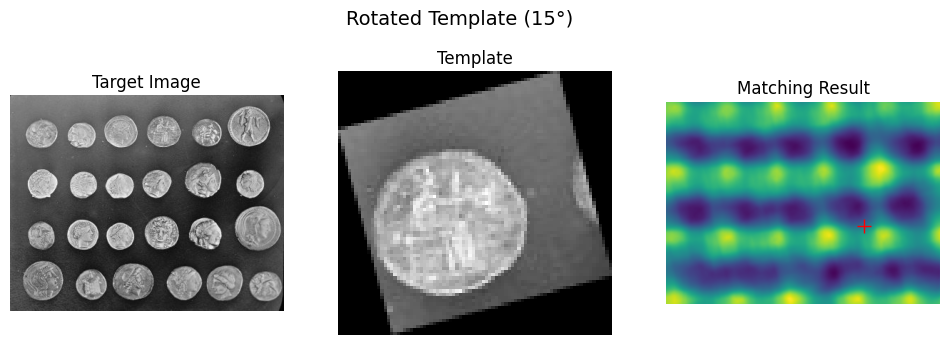

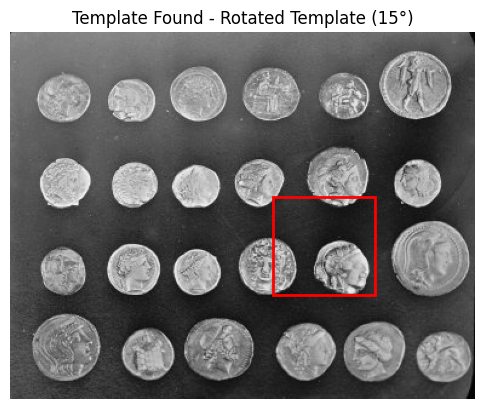

Best match at (x,y): (217, 136) with template size: (81, 84)

=== Scaled Template (1.2x) ===


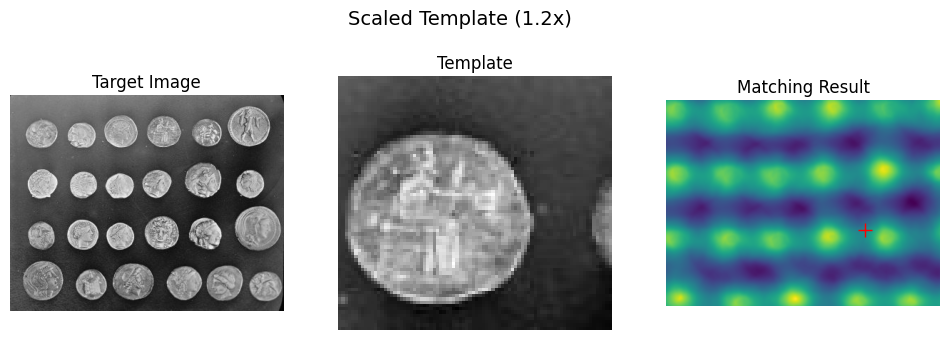

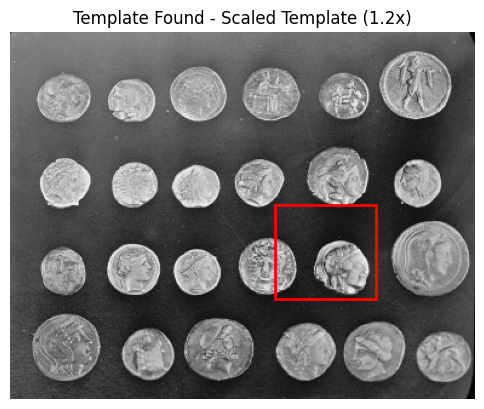

Best match at (x,y): (218, 142) with template size: (78, 84)

=== Combined Rotation (-10°) and Scaling (0.8x) ===


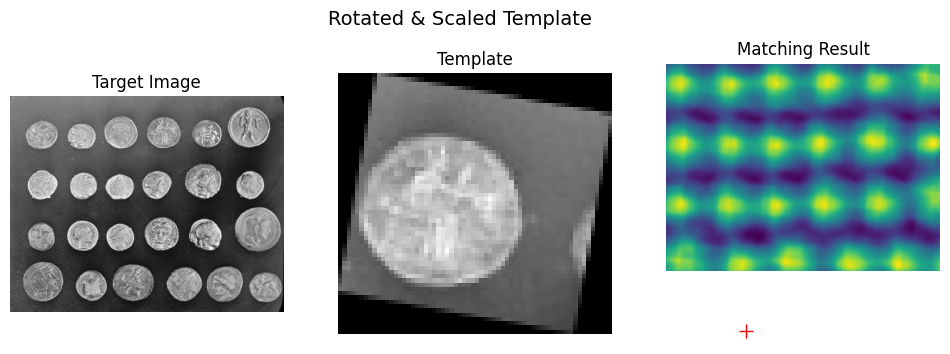

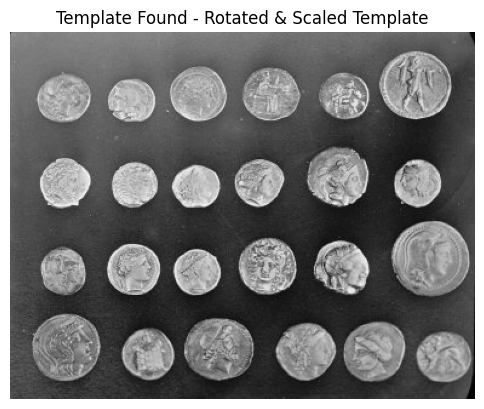

Best match at (x,y): (93, 313) with template size: (61, 64)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
from skimage.transform import rotate, rescale

# Load target image and create template
image = data.coins()
original_template = image[15:80, 190:260]

# Create modified templates
rotated_template = rotate(original_template, angle=15, resize=True)
scaled_template = rescale(original_template, scale=1.2)

# Function to perform and visualize template matching
def test_template_matching(img, temp, title):
    result = match_template(img, temp)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]
    
    # Visualization
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(title, fontsize=14)
    
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Target Image')
    ax[0].set_axis_off()
    
    ax[1].imshow(temp, cmap='gray')
    ax[1].set_title('Template')
    ax[1].set_axis_off()
    
    ax[2].imshow(result, cmap='viridis')
    ax[2].set_title('Matching Result')
    ax[2].set_axis_off()
    ax[2].plot(y, x, 'r+', markersize=10)
    
    # Display found template on original image
    fig2, ax_main = plt.subplots(figsize=(6, 6))
    ax_main.imshow(img, cmap='gray')
    ax_main.set_title(f'Template Found - {title}')
    ax_main.set_axis_off()
    h, w = temp.shape
    rect = plt.Rectangle((y, x), w, h, edgecolor='r', facecolor='none', lw=2)
    ax_main.add_patch(rect)
    
    plt.show()
    
    print(f"Best match at (x,y): ({y}, {x}) with template size: {temp.shape}")

# Test original template
print("=== Original Template ===")
test_template_matching(image, original_template, "Original Template")

# Test rotated template
print("\n=== Rotated Template (15 degrees) ===")
test_template_matching(image, rotated_template, "Rotated Template (15°)")

# Test scaled template
print("\n=== Scaled Template (1.2x) ===")
test_template_matching(image, scaled_template, "Scaled Template (1.2x)")

# Additional test - combined rotation and scaling
combined_template = rotate(rescale(original_template, scale=0.8), angle=-10, resize=True)
print("\n=== Combined Rotation (-10°) and Scaling (0.8x) ===")
test_template_matching(image, combined_template, "Rotated & Scaled Template")